## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from pmdarima import auto_arima

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Regression Forecast for the Last 8 Observations')
    plt.xlabel('Time')
    plt.ylabel('EUNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Import Data

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/EUNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG1,EUNG_LAG2,EUNG_LAG3,EUNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.000000,0.003724,-0.018485,-0.014546,0.029306,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.088868,0.000000,0.003724,-0.018485,-0.014546,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.013699,0.088868,0.000000,0.003724,-0.018485,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.060409,-0.013699,0.088868,0.000000,0.003724,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.048790,-0.060409,-0.013699,0.088868,0.000000,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,0.021344,0.636412,0.631536,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.730063,0.646442,-0.044776,0.021344,0.636412,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.520405,-0.730063,0.646442,-0.044776,0.021344,0.015792,1.58,1.38,0.005921,1,1


## Test Importance

In [4]:
y = df['EUNG']
X = df[["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","EUNG_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.650
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.04e-05
Time:                        11:43:52   Log-Likelihood:                 33.842
No. Observations:                 109   AIC:                            -45.68
Df Residuals:                      98   BIC:                            -16.08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prune Dataset

In [5]:
selected_columns = ["EUNG","EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df

,EUNG,EUNG_LAG1,EUNG_LAG2,EUNG_LAG3,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,
1996-07-01,0.000000,0.003724,-0.018485,-0.014546,-0.196710,0,0
1996-10-01,0.088868,0.000000,0.003724,-0.018485,0.083382,0,0
1997-01-01,-0.013699,0.088868,0.000000,0.003724,-0.446287,0,0
1997-04-01,-0.060409,-0.013699,0.088868,0.000000,0.782759,0,0
1997-07-01,-0.048790,-0.060409,-0.013699,0.088868,0.041964,0,0
...,...,...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,0.021344,0.636412,-0.083527,1,1
2022-10-01,-0.730063,0.646442,-0.044776,0.021344,-0.269102,1,1
2023-01-01,-0.520405,-0.730063,0.646442,-0.044776,0.005921,1,1


## Simple Regressor

In [23]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[['EUNG_LAG1']]
y_train = train['EUNG']

X_test = test[['EUNG_LAG1']]
y_test = test['EUNG']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     28.15
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           6.88e-07
Time:                        11:55:27   Log-Likelihood:                 42.858
No. Observations:                 101   AIC:                            -81.72
Df Residuals:                      99   BIC:                            -76.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.016      0.761      0.4

In [24]:
y_test

DATE
2021-10-01    0.636412
2022-01-01    0.021344
2022-04-01   -0.044776
2022-07-01    0.646442
2022-10-01   -0.730063
2023-01-01   -0.520405
2023-04-01   -0.396592
2023-07-01   -0.066661
Name: EUNG, dtype: float64

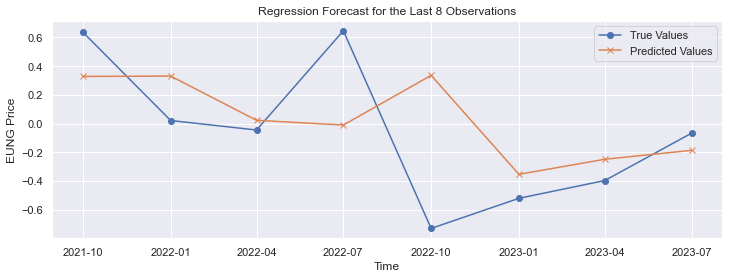

In [25]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [26]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.3553
MAPE: 268.2239 %
MSE: 0.2283
RMSE: 0.4779


### Save

In [10]:
df = pd.DataFrame({'EUNG Q UR': predictions, 'Actual': y_test})
df.to_excel("EUNG_Q_UR_forecast.xlsx", index=True)
df

,EUNG Q UR,Actual
DATE,,
2021-10-01,0.328331,0.636412
2022-01-01,0.330772,0.021344
2022-04-01,0.022820,-0.044776
2022-07-01,-0.010286,0.646442
2022-10-01,0.335794,-0.730063
2023-01-01,-0.353396,-0.520405
2023-04-01,-0.248424,-0.396592
2023-07-01,-0.186433,-0.066661


In [11]:
# Open a file in write mode
with open('EUNG Q UR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

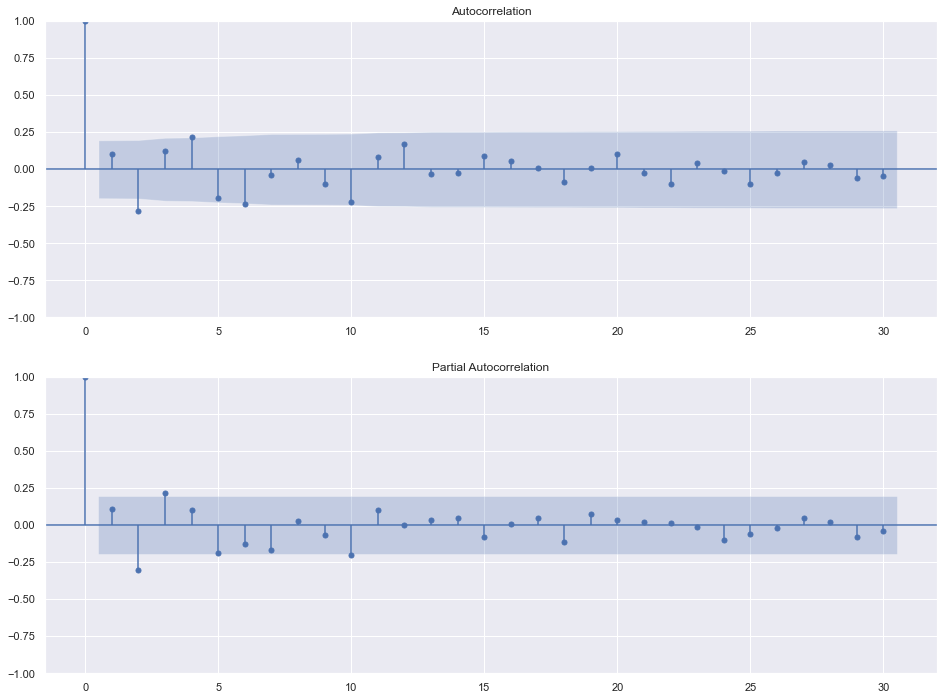

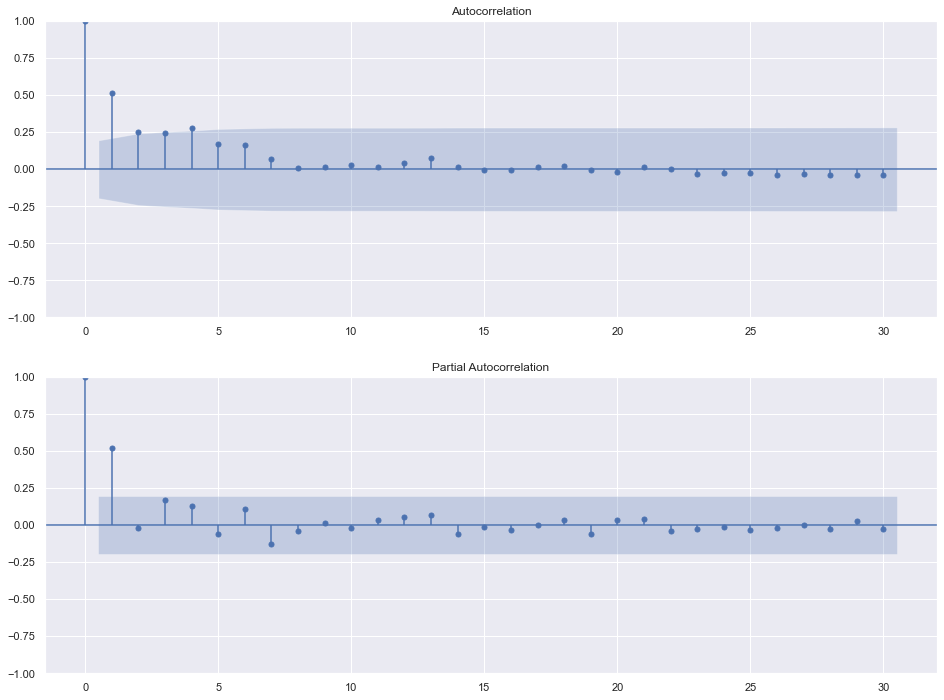

In [33]:
import scipy.stats as stats
residuals = model.resid

# Calculate squared residuals
squared_residuals = residuals ** 2

# Print ACF and PACF for residuals
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax[1])
plt.show()


fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sm.graphics.tsa.plot_acf(squared_residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(squared_residuals, lags=30, ax=ax[1])
plt.show()

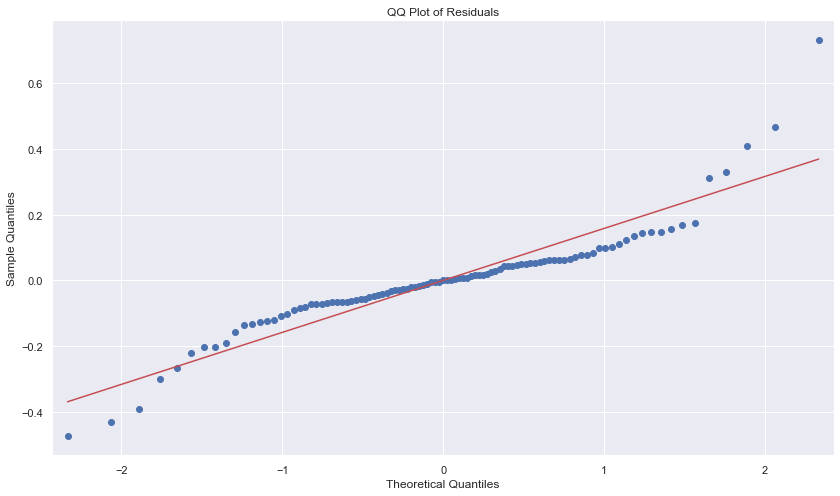

Sample does not follow Normal Distribution (reject H0)


In [35]:
import statsmodels.api as sm

fig = plt.figure(figsize=(14, 8))
qq = sm.qqplot(residuals, line='s', ax=fig.add_subplot(111))
plt.title('QQ Plot of Residuals')
plt.show()

stat, p = stats.shapiro(residuals)

# Interpretation of the normality test
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not follow Normal Distribution (reject H0)')

## Multiple Regressor

In [17]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","COV19"]]
y_train = train['EUNG']

X_test = test[["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","COV19"]]
y_test = test['EUNG']

#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   EUNG   R-squared (uncentered):                   0.426
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              17.96
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                    4.56e-11
Time:                        11:51:12   Log-Likelihood:                          57.707
No. Observations:                 101   AIC:                                     -107.4
Df Residuals:                      97   BIC:                                     -96.95
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

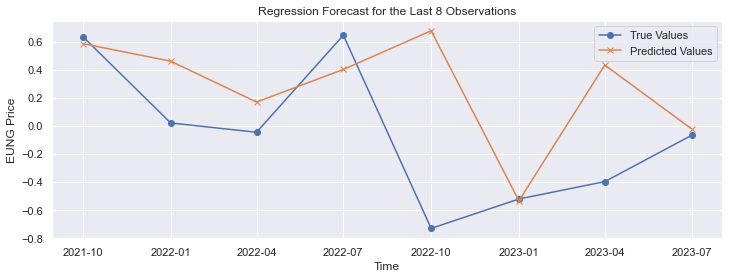

In [18]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [19]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.4059
MAPE: 382.8954 %
MSE: 0.3723
RMSE: 0.6102


### Save

In [18]:
df = pd.DataFrame({'EUNG Q MR': predictions, 'Actual': y_test})
df.to_excel("EUNG_Q_MR_forecast.xlsx", index=True)
df

,EUNG Q MR,Actual
DATE,,
2021-10-01,0.586494,0.636412
2022-01-01,0.461743,0.021344
2022-04-01,0.170621,-0.044776
2022-07-01,0.402752,0.646442
2022-10-01,0.678420,-0.730063
2023-01-01,-0.533151,-0.520405
2023-04-01,0.434200,-0.396592
2023-07-01,-0.021068,-0.066661


In [19]:
# Open a file in write mode
with open('EUNG Q MR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

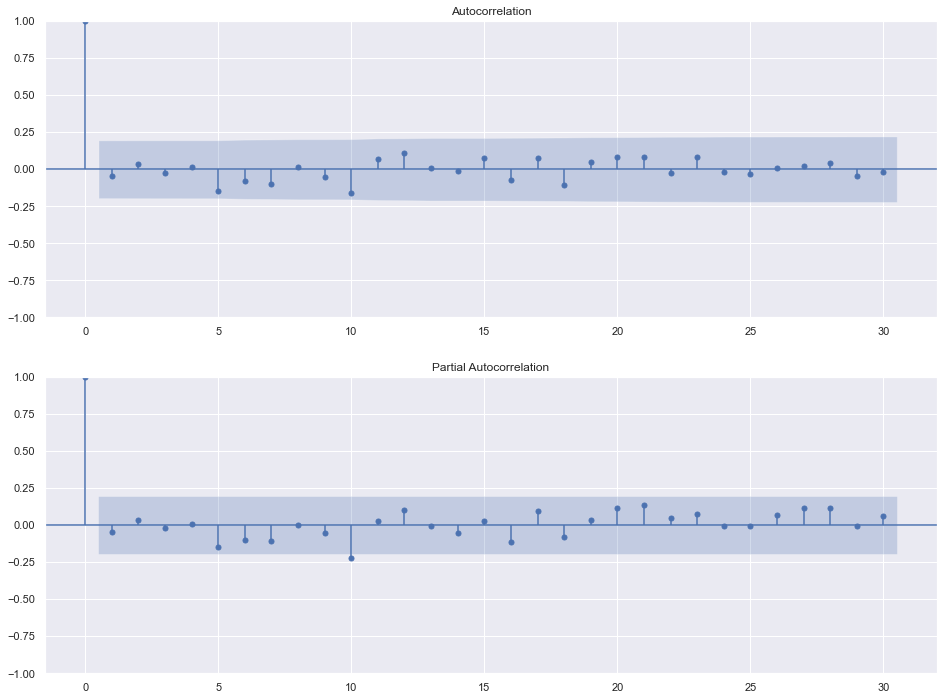

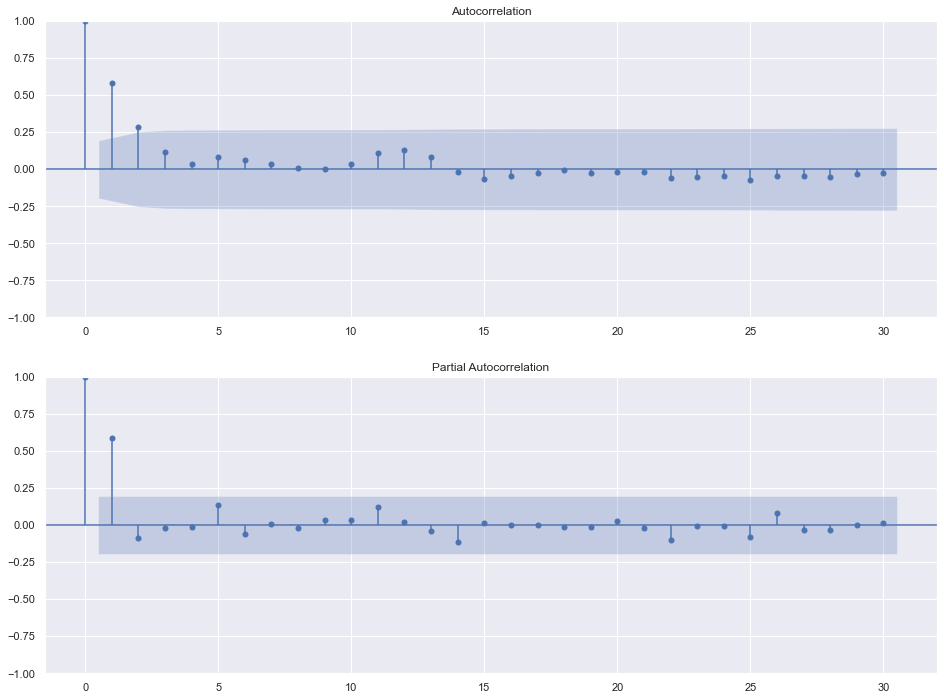

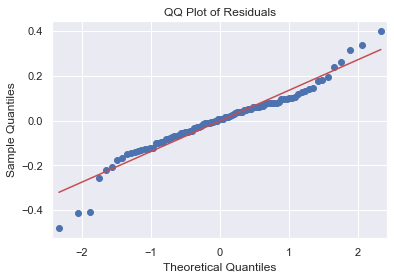

Shapiro-Wilk Test: Statistics=0.952, p=0.001
Sample does not follow Normal Distribution (reject H0)


In [20]:
import scipy.stats as stats
residuals = model.resid

# Calculate squared residuals
squared_residuals = residuals ** 2

# Print ACF and PACF for residuals
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax[1])
plt.show()


fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sm.graphics.tsa.plot_acf(squared_residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(squared_residuals, lags=30, ax=ax[1])
plt.show()

# QQ plot for residuals to check normality
fig = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Perform a normality test (e.g., Shapiro-Wilk Test)
stat, p = stats.shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation of the normality test
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not follow Normal Distribution (reject H0)')